### Outliers
* **Point outliers**: observations anomalous with respect to the majority of observations in a feature (aka univariate outlier)
* **Contextual outliers**: observations considered anomalous given a specific context
* **Collective outliers**

### Outlier Detection

* **Tukey Boxplot**: Boxplot whiskers are set at 1.5(IQR). if you see data points pas these whiskers they are outliers

In [1]:
import pandas as pd
import numpy as np

In [15]:
arr = np.array([25, 28, 29, 29, 30, 34, 35, 35, 37, 38])
df = pd.DataFrame(arr)

<AxesSubplot:>

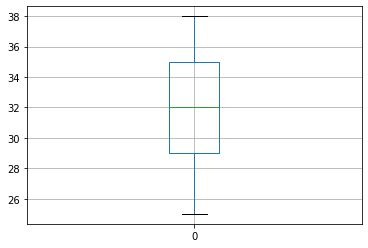

In [16]:
df.boxplot()

<AxesSubplot:>

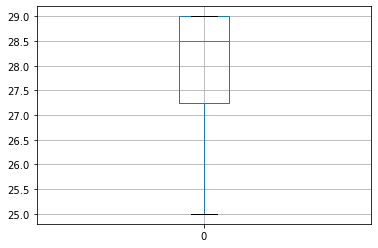

In [26]:
df.iloc[:4,:].boxplot()

In [21]:
arr

array([25, 28, 29, 29, 30, 34, 35, 35, 37, 38])

In [23]:
arr[:5].mean()

28.2

In [24]:
arr[5:].mean()

35.8

In [37]:
iris = pd.read_csv('data/iris.csv')

In [38]:
iris_df = iris.drop(['Unnamed: 0'], axis=1)
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [35]:
import seaborn as sb

<AxesSubplot:xlabel='Species', ylabel='Sepal.Length'>

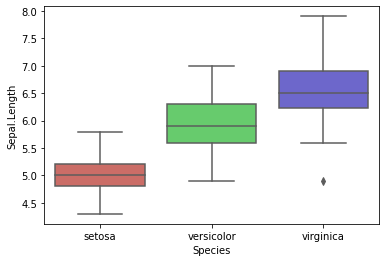

In [40]:
sb.boxplot(x='Species', y='Sepal.Length', data=iris_df, palette='hls')